In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load csv file
data = pd.read_csv("/home/kiwi/DJR/benchmark_results.csv")
print(data.head())

   size  sparsity  approach      time
0     8       0.1  ansatz_0  0.018219
1     8       0.1  ansatz_1  0.007561
2     8       0.1  ansatz_2  0.006492
3     8       0.3  ansatz_0  0.016760
4     8       0.3  ansatz_1  0.007070


In [14]:

# Create a pivot table sparsity
pivot_df = data.pivot_table(
    index=["sparsity"],
    columns="approach",
    values="time",
    aggfunc="mean",
).reset_index()

print(pivot_df)

approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  1.366627  1.141139  0.383961
1              0.3  1.350635  0.742386  0.403497
2              0.5  1.318214  0.335573  0.384026
3              0.7  1.286802  0.189209  0.372561
4              0.9  1.190558  0.051014  0.375836


<Axes: title={'center': 'Benchmark Results'}, xlabel='Size', ylabel='Time (s)'>

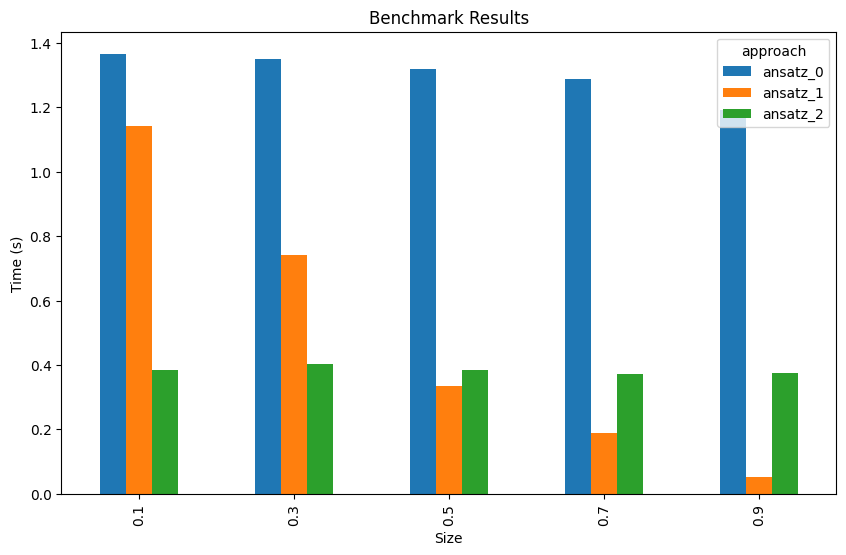

In [15]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(
    x="sparsity",
    kind="bar",
    ax=ax,
    title="Benchmark Results",
    xlabel="Size",
    ylabel="Time (s)",
)

In [16]:
# create pivot table size
pivot_df = data.pivot_table(
    index=["size"],
    columns="approach",
    values="time",
    aggfunc="mean",
).reset_index()

print(pivot_df)

approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.017103  0.007235  0.006667
1           16  0.028908  0.008845  0.007851
2           32  0.070401  0.022347  0.015759
3           64  0.259175  0.060909  0.051854
4          128  1.125620  0.345759  0.270386
5          256  6.314195  2.506089  1.951339


<Axes: title={'center': 'Benchmark Results'}, xlabel='Size', ylabel='Time (s)'>

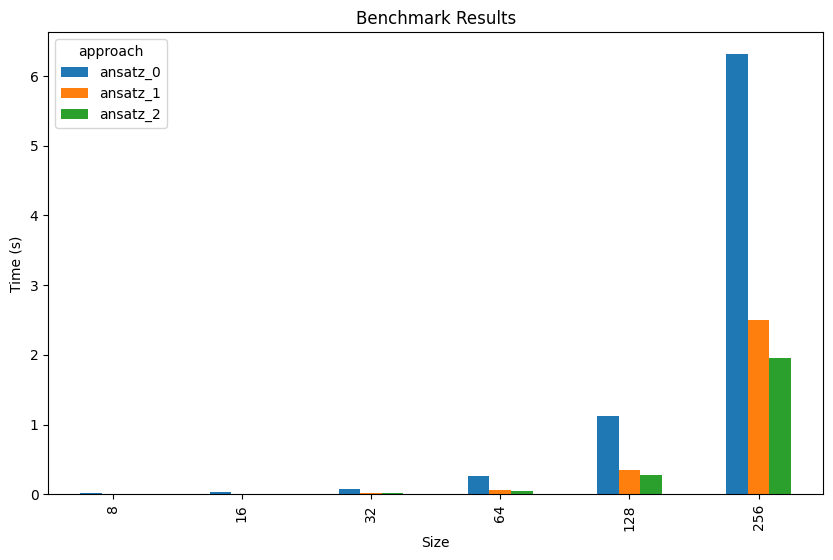

In [17]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(
    x="size",
    kind="bar",
    ax=ax,
    title="Benchmark Results",
    xlabel="Size",
    ylabel="Time (s)",
)

In [18]:

# X-Achsen-Labels erstellen: Kombination aus size und sparsity
data['size_sparsity'] = list(zip(data['size'], data['sparsity']))
x_labels = [f"({s}, {sp})" for s, sp in data['size_sparsity'].unique()]

# Approaches extrahieren
approaches = data['approach'].unique()
num_approaches = len(approaches)
num_groups = len(x_labels)


In [19]:

# Balkenpositionen berechnen
bar_width = 0.8 / num_approaches  # Balkenbreite anpassen
index = np.arange(num_groups)


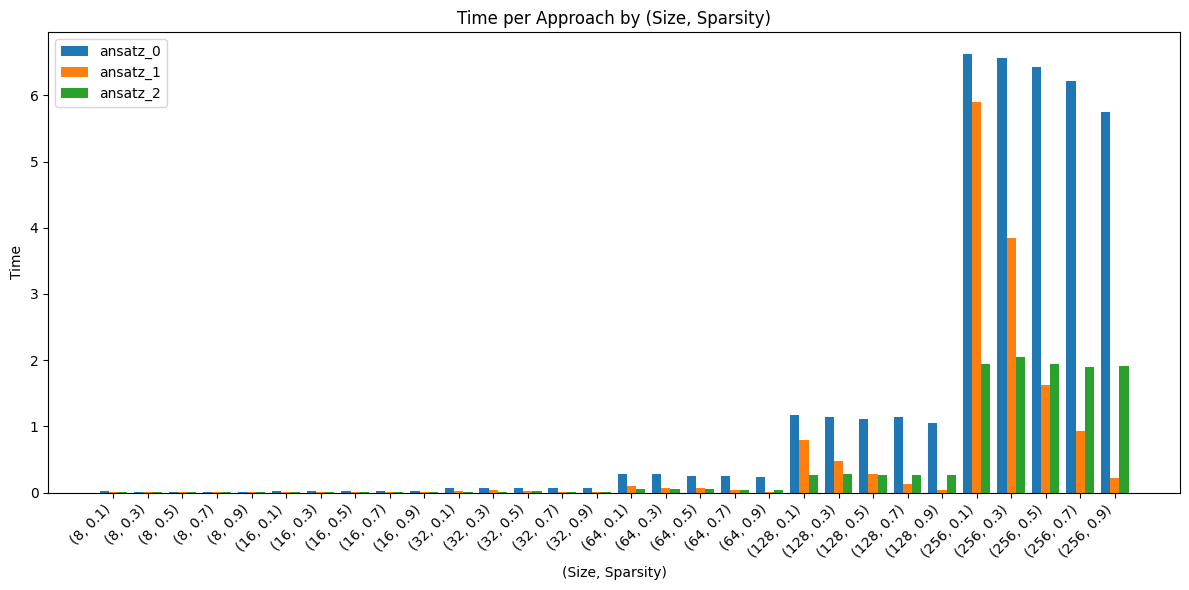

In [20]:

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

for i, approach in enumerate(approaches):
    approach_data = data[data['approach'] == approach]
    times = approach_data['time']
    # Sicherstellen, dass die Reihenfolge mit x_labels übereinstimmt
    ordered_times = []
    for label in x_labels:
        s, sp = eval(label)  # Konvertiere String zurück zu Tupel
        mask = (approach_data['size'] == s) & (approach_data['sparsity'] == sp)
        ordered_times.append(approach_data[mask]['time'].values[0])
    ax.bar(index + i * bar_width, ordered_times, bar_width, label=approach)

# Beschriftungen
ax.set_xlabel('(Size, Sparsity)')
ax.set_ylabel('Time')
ax.set_title('Time per Approach by (Size, Sparsity)')
ax.set_xticks(index + bar_width * (num_approaches / 2 - 0.5))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.018219  0.007561  0.006492
1              0.3  0.016760  0.007070  0.006627
2              0.5  0.016692  0.007205  0.006785
3              0.7  0.017255  0.007155  0.006496
4              0.9  0.016586  0.007186  0.006935
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.029716  0.011354  0.008152
1              0.3  0.029139  0.009665  0.007929
2              0.5  0.028063  0.008310  0.007586
3              0.7  0.026912  0.007544  0.007555
4              0.9  0.030712  0.007353  0.008035
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.070353  0.029198  0.013414
1              0.3  0.069051  0.032818  0.013006
2              0.5  0.074811  0.026991  0.026198
3              0.7  0.069804  0.014865  0.013121
4              0.9  0.067985  0.007863  0.013059
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.286404  0.106784  0.058641
1              0.3  

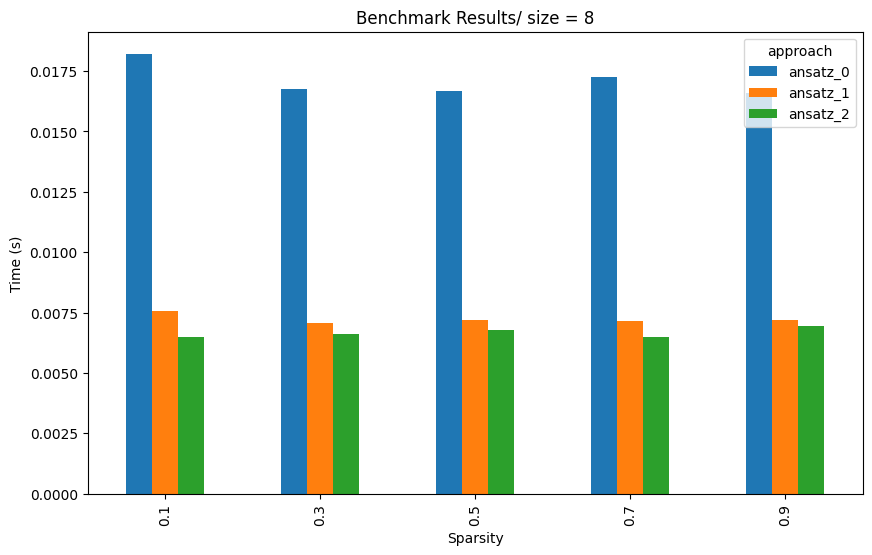

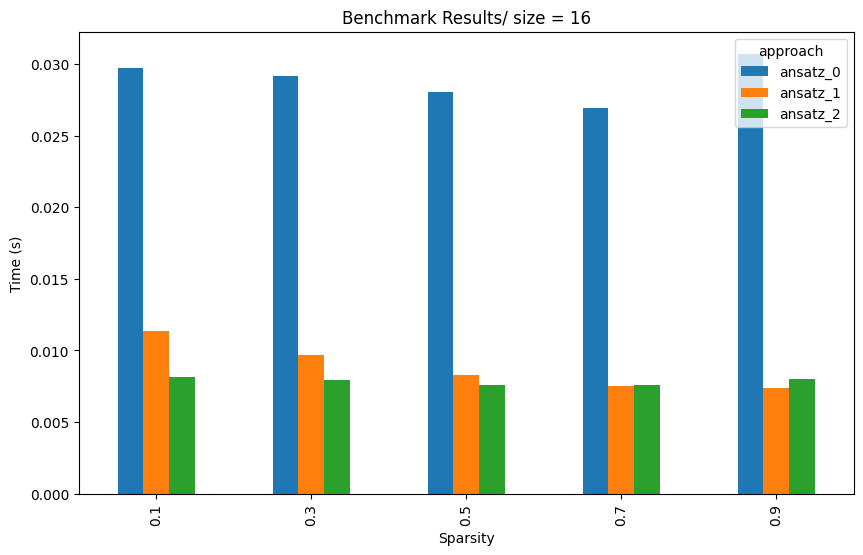

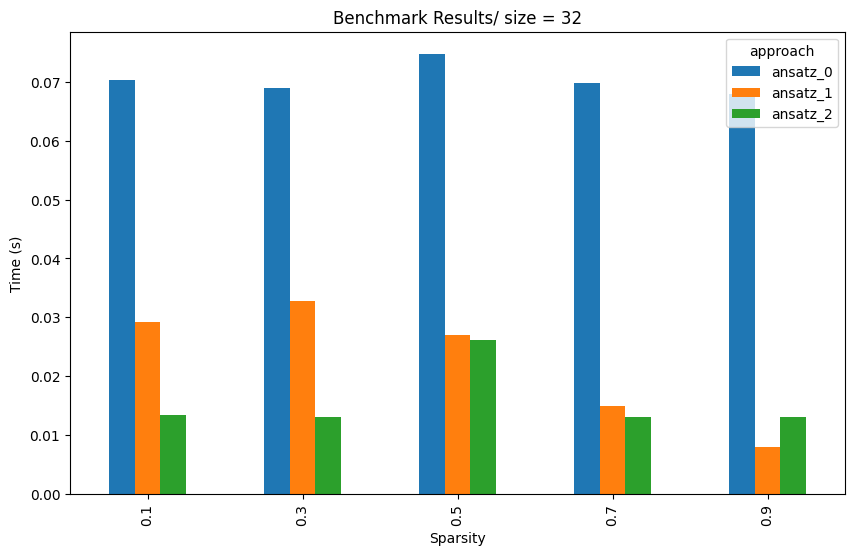

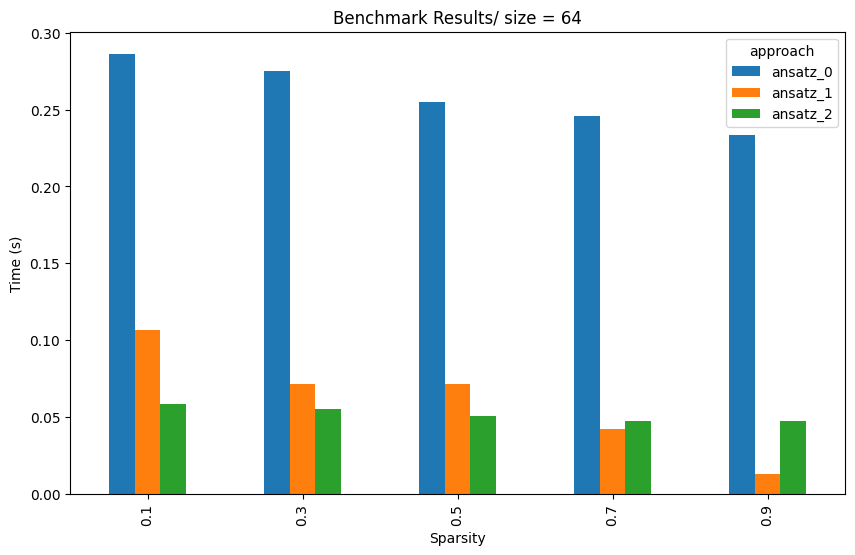

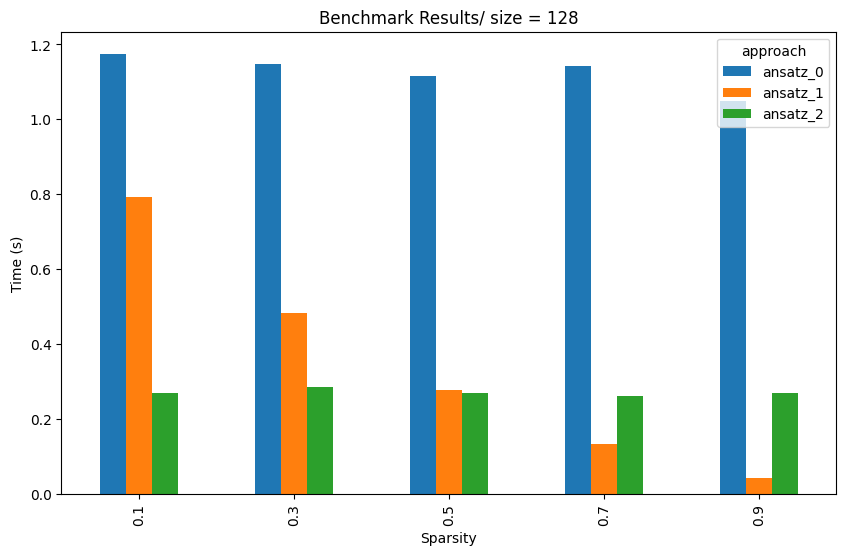

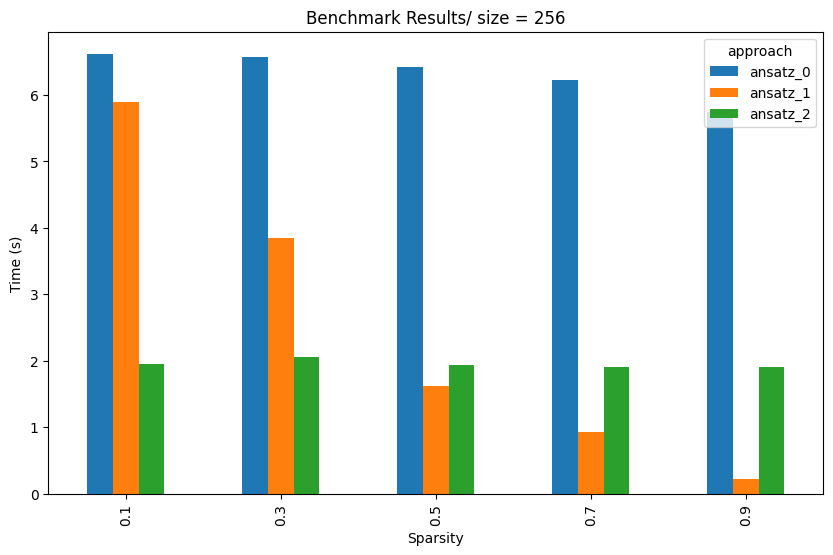

In [21]:

size_list = [8,16,32,64,128,256]


for i in size_list:
    pivot_df = (data[data["size"] == i].pivot_table(
        index=["sparsity"],
        columns="approach",
        values="time",
        aggfunc="mean",
    ).reset_index()
    )

    print(pivot_df)

    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_df.plot(
        x="sparsity",
        kind="bar",
        ax=ax,
        title=f"Benchmark Results/ size = {i}",
        xlabel="Sparsity",
        ylabel="Time (s)",
    )

In [22]:
data[data["sparsity"] == 0.3]

,size,sparsity,approach,time,size_sparsity
3,8,0.3,ansatz_0,0.016760,"(8, 0.3)"
4,8,0.3,ansatz_1,0.007070,"(8, 0.3)"
5,8,0.3,ansatz_2,0.006627,"(8, 0.3)"
18,16,0.3,ansatz_0,0.029139,"(16, 0.3)"
19,16,0.3,ansatz_1,0.009665,"(16, 0.3)"
20,16,0.3,ansatz_2,0.007929,"(16, 0.3)"
33,32,0.3,ansatz_0,0.069051,"(32, 0.3)"
34,32,0.3,ansatz_1,0.032818,"(32, 0.3)"
35,32,0.3,ansatz_2,0.013006,"(32, 0.3)"
48,64,0.3,ansatz_0,0.275319,"(64, 0.3)"


approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.018219  0.007561  0.006492
1           16  0.029716  0.011354  0.008152
2           32  0.070353  0.029198  0.013414
3           64  0.286404  0.106784  0.058641
4          128  1.175130  0.793490  0.267816
5          256  6.619940  5.898445  1.949248
approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.016760  0.007070  0.006627
1           16  0.029139  0.009665  0.007929
2           32  0.069051  0.032818  0.013006
3           64  0.275319  0.071674  0.055114
4          128  1.147901  0.483384  0.285792
5          256  6.565643  3.849703  2.052515
approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.016692  0.007205  0.006785
1           16  0.028063  0.008310  0.007586
2           32  0.074811  0.026991  0.026198
3           64  0.254773  0.071100  0.050858
4          128  1.114852  0.277145  0.269632
5          256  6.420093  1.622689  1.943095
approach  size  ansatz_0  ansatz_1  ansatz_2
0         

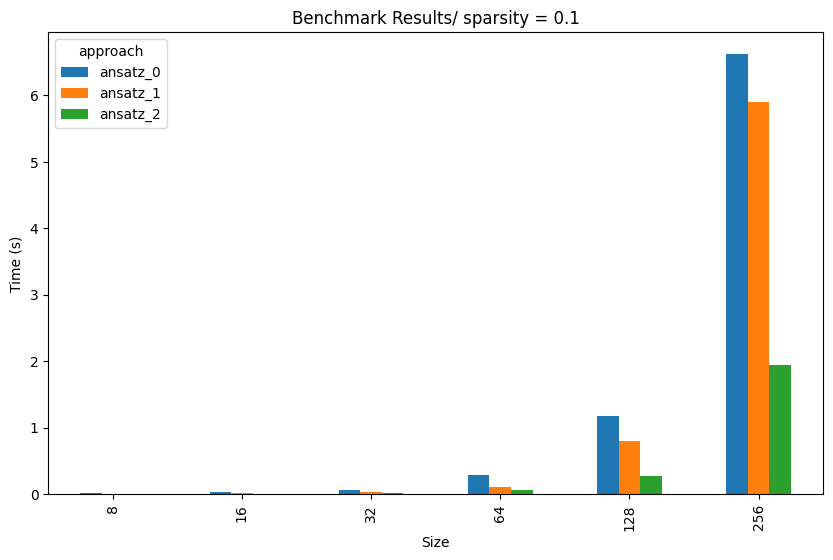

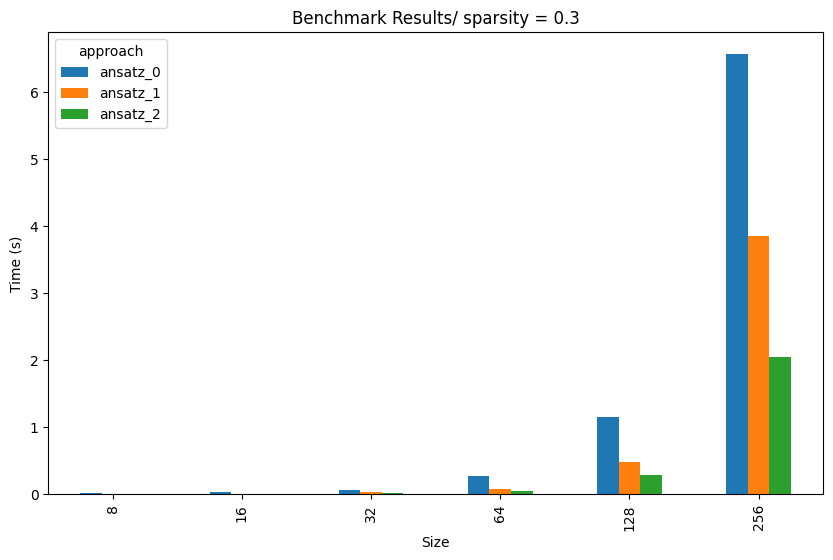

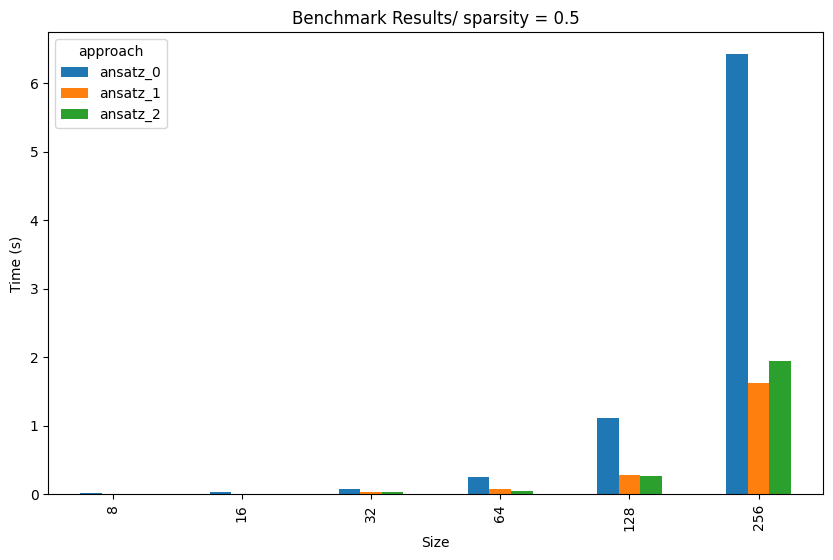

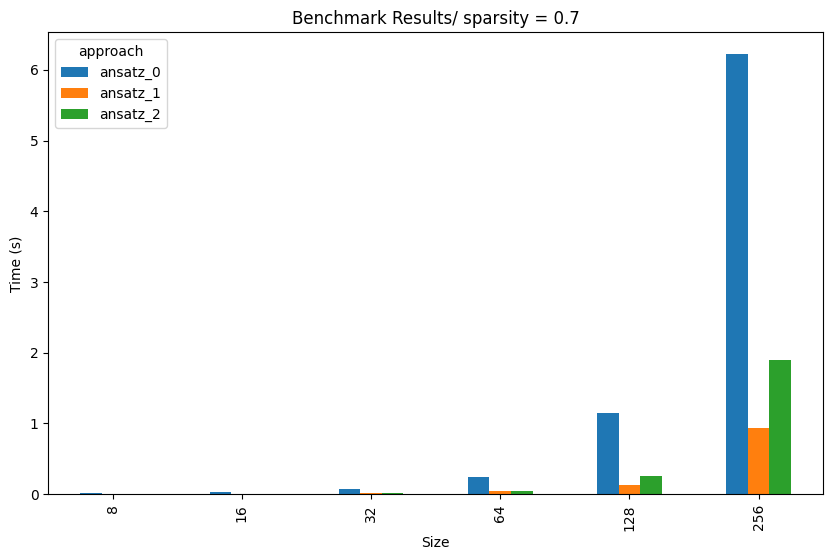

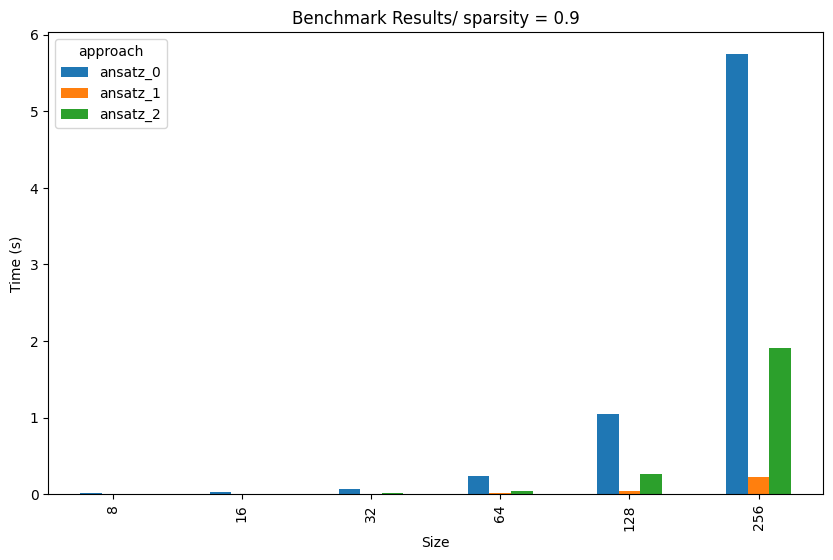

In [23]:
sparsity_list = [0.1, 0.3, 0.5, 0.7, 0.9]


for i in sparsity_list:
    pivot_df = (data[data["sparsity"] == i].pivot_table(
            index=["size"],
            columns="approach",
            values="time",
            aggfunc="mean",
        ).reset_index()
    )

    print(pivot_df)

    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_df.plot(
        x="size",
        kind="bar",
        ax=ax,
        title=f"Benchmark Results/ sparsity = {i}",
        xlabel="Size",
        ylabel="Time (s)",
    )